# Project 4: Predicting Outbreaks of West Nile Virus in Chicago

### Notebook 3 : Modelling

#### 1. Chose classifier models - 

##### For Price Direction Prediction (Up or Down) 

Logistic Regression with CountVectorizer, Logistic Regression with TFID, Naive Bayes with TFID, Random Forest with TFID,3 layers of Stacked LSTM,LSTM with Convolutional Neural Network for Sequence Classification

The model was selected based on accuracy, ROC AUC and sensitivity. The accuracy of the production model is ____, compared to the baseline accuracy of 0.948.
The final model picked ....  We want to maximise sensitivity because the cost of predicting a false negative can lead to loss of lives.

This portion of the notebook will be modelling to predict if VIX (Y variable) is up or down on , we will be using the below models :

1. Logistic Regression with CountVectorizer
2. Logistic Regression with TFID
3. Naive Bayes with TFID
4. Random Forest with TFID
5. 3 layers of Stacked LSTM
6. LSTM with Convolutional Neural Network for Sequence Classification

In [2]:
# get some libraries that will be useful

import re
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
import pandas_datareader as dr
#To remove weekends from dataset
from pandas.tseries.offsets import BDay

# necessary libraries for wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
#words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

# function for encoding categories
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, SGDRegressor,LogisticRegression
#keras modeling
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, accuracy_score

%matplotlib inline

C:\Users\PC\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
# grab the data #we will first grab the news data set first
combined_news = pd.read_csv("../data/final_dataframe.csv")

In [4]:
combined_news.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,upordown
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",0.0
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0.0
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",1.0
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,0.0
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refus

In [4]:
#this is our Y variable.
combined_news['upordown'].value_counts(normalize= True)

0.0    0.603821
1.0    0.396179
Name: upordown, dtype: float64

### Baseline Accuracy
Our baseline accuracy is 60%.

## Preprocessor function to clean the text 

The final iteration of cleaner(text) does the following:

1. Grouping into stems
2. Excluding stopwords
3. Removing punctuation
4. Removing digits
5. Removing spaces

### This function will be used as preprocessor on both CountVectorizer and TfidfVectorizer

Some words share the same stem and can be combined in the next round of CountVectorize: file/files, game/games, http/https, imgur/imgur com, run/running, start/started, thing/things, tried/try/trying, use/used/using, windows/windows 10, work/working/works.

We will use porter stemmer to clean the words 

In [5]:
def cleaner(text):
    stemmer = PorterStemmer()                                          # groups words having the same stems
    stop = stopwords.words('english')                                  # excludes stop words
    text = text.translate(str.maketrans('', '', string.punctuation))   # removes punctuation
    text = text.translate(str.maketrans('', '', string.digits))        # removes digits
    text = text.lower().strip()                                        # removes spaces
    final_text = []
    for w in text.split():
        if w not in stop:
            final_text.append(stemmer.stem(w.strip()))
    return ' '.join(final_text)

In [6]:
#Lets split our dataframe first into training and test dataset.
#train = combined_news[combined_news['Date'] < '2014-01-01'] #train data will consist from 2008 to 2014 (~4 years)
#y_train =  train["upordown"]
#test = combined_news[combined_news['Date'] > '2013-12-31'] #test date will consist from 2013 to 2016 (~3years)
#y_test =  train["upordown"]

X = combined_news
y = combined_news['upordown']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33,stratify = y, random_state=42)

In [7]:
#to form a string for all top 25 of news headlines for X_train
trainheadlines = []
for row in range(0,len(X_train.index)):
    trainheadlines.append(' '.join(str(x) for x in X_train.iloc[row,2:27]))

# Let's try Logistic Regression with Countvectorizer 

In [8]:
basicvectorizer = CountVectorizer(preprocessor=cleaner,  
                                  min_df=0.03, 
                                  max_df=0.97, 
                                  max_features = 200000, 
                                  ngram_range = (2, 2))

basictrain = basicvectorizer.fit_transform(trainheadlines)
basictrain

<1332x104 sparse matrix of type '<class 'numpy.int64'>'
	with 7681 stored elements in Compressed Sparse Row format>

In [9]:
#Fitting the model
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, y_train)

In [10]:
#Training Accuracy Score
trainingacc1 = basicmodel.score(basictrain, y_train)
print('Training Accuracy Score: ',trainingacc1 )

Training Accuracy Score:  0.6223723723723724


In [11]:
#Create test headlines
testheadlines = []

for row in range(0,len(X_val.index)):
    
    testheadlines.append(' '.join(str(x) for x in X_val.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
preds1 = basicmodel.predict(basictest)
preds1.shape

(657,)

In [12]:
#test accuracy score
acc1=accuracy_score(y_val, preds1)
print('Logic Regression 1 accuracy: ',acc1 )
#our accuracy for test score is only 56%

Logic Regression 1 accuracy:  0.563165905631659


In [13]:
# predict ROC-AUC score for testing data
y_pred_test1 = basicmodel.predict(basictest)
rocauc1 = roc_auc_score(y_val,y_pred_test1)
print("ROC-AUC-score1 :", rocauc1)

ROC-AUC-score1 : 0.4971856229412904


In [14]:
basicwords = basicvectorizer.get_feature_names()

basiccoeffs = basicmodel.coef_.tolist()[0]

coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})

coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])

coeffdf.head(5) #these are words that contributes to the rise of VIX.

,Word,Coefficient
3,around world,0.618227
39,least peopl,0.612526
69,sex abus,0.531059
42,new law,0.524573
51,offici said,0.450549


In [15]:
coeffdf.tail(5) #these are words that contributes to the fall of VIX

,Word,Coefficient
12,court rule,-0.402620
52,offici say,-0.405361
17,drug cartel,-0.583001
84,uk govern,-0.640962
30,intellig agenc,-0.726090


# Lets try Logistic Regression with TFID

In [16]:
advancedvectorizer = TfidfVectorizer(preprocessor=cleaner, 
                                     min_df=0.03, 
                                     max_df=0.97, 
                                     max_features = 200000, 
                                     ngram_range = (1, 2))

advancedtrain = advancedvectorizer.fit_transform(trainheadlines)

In [17]:
advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(advancedtrain, y_train)

In [18]:
#Training Accuracy Score
trainingacc2 = advancedmodel.score(advancedtrain, y_train)
print('Training Accuracy Score: ',trainingacc2)

Training Accuracy Score:  0.7545045045045045


In [19]:
testheadlines = []
for row in range(0,len(X_val.index)):
    testheadlines.append(' '.join(str(x) for x in X_val.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
preds2 = advancedmodel.predict(advancedtest)
#Testing accuracy score
acc2=accuracy_score(y_val, preds2)

In [20]:
print('Logic Regression 2 accuracy: ', acc2) #60% accuracy

Logic Regression 2 accuracy:  0.604261796042618


In [21]:
advwords = advancedvectorizer.get_feature_names()
advcoeffs = advancedmodel.coef_.tolist()[0]
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(5)#these are words that contributes to the rise of VIX.

,Words,Coefficient
69,amp,1.110758
1077,norway,1.100748
295,citizen,1.011830
1618,train,1.003494
972,marijuana,1.000381


In [22]:
advcoeffdf.tail(5)#these are words that contributes to the fall of VIX.

,Words,Coefficient
1087,obama,-0.876816
508,egyptian,-0.877877
1479,squar,-0.912582
627,flood,-1.004526
997,mexico,-1.025604


In [23]:
# predict ROC-AUC score for testing data
y_pred_test2 = advancedmodel.predict(advancedtest)
rocauc2 = roc_auc_score(y_val,y_pred_test2)
print("ROC-AUC-score1 :", rocauc2)

ROC-AUC-score1 : 0.5179180391397017


# Let us try with Naive Bayes + TFID

In [24]:
advancedvectorizer = TfidfVectorizer(preprocessor=cleaner, 
                                     min_df=0.03, 
                                     max_df=0.97, 
                                     max_features = 200000, 
                                     ngram_range = (2, 2))
advancednb = advancedvectorizer.fit_transform(trainheadlines)

In [25]:
print(advancednb.shape)

(1332, 104)


In [26]:
advancedmodel = MultinomialNB(alpha=0.01)
advancedmodel = advancedmodel.fit(advancednb, y_train)

#Training Accuracy Score
trainingacc3 = basicmodel.score(advancednb, y_train)
print('Training Accuracy Score: ',trainingacc3)

Training Accuracy Score:  0.6178678678678678


In [27]:
#Creating Test headlines
testheadlines = []
for row in range(0,len(X_val.index)):
    testheadlines.append(' '.join(str(x) for x in X_val.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
preds3 = advancedmodel.predict(advancedtest)
acc3=accuracy_score(y_val, preds3)

In [28]:
print('NBayes 1 accuracy: ', acc3) # accuracy 60% 

NBayes 1 accuracy:  0.6057838660578386


In [29]:
# predict ROC-AUC score for testing data
y_pred_test3 = advancedmodel.predict(advancedtest)
rocauc3 = roc_auc_score(y_val,y_pred_test3)
print("ROC-AUC-score1 :", rocauc3)

ROC-AUC-score1 : 0.5092230187948072


In [30]:
nbwords = advancedvectorizer.get_feature_names()
nbcoeffs = advancedmodel.coef_.tolist()[0]
nbcoeffdf = pd.DataFrame({'Words' : nbwords, 
                        'Coefficient' : nbcoeffs})
nbcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
nbcoeffdf.head(5)

,Words,Coefficient
69,amp,1.110758
1077,norway,1.100748
295,citizen,1.011830
1618,train,1.003494
972,marijuana,1.000381


In [31]:
nbcoeffdf.tail(5)

,Words,Coefficient
1087,obama,-0.876816
508,egyptian,-0.877877
1479,squar,-0.912582
627,flood,-1.004526
997,mexico,-1.025604


# Random Forest  with TDIF

In [32]:
advancedvectorizer = TfidfVectorizer(preprocessor=cleaner, 
                                     min_df=0.03, 
                                     max_df=0.97, 
                                     max_features = 200000, 
                                     ngram_range = (2, 2))
advancedrf = advancedvectorizer.fit_transform(trainheadlines)

In [33]:
advancedrf

<1332x104 sparse matrix of type '<class 'numpy.float64'>'
	with 7681 stored elements in Compressed Sparse Row format>

In [34]:
print(advancedrf.shape)

(1332, 104)


In [35]:
advancedmodel = RandomForestClassifier()
advancedmodel = advancedmodel.fit(advancedrf, y_train)

#Training Accuracy Score
trainingacc4 = advancedmodel.score(advancedrf, y_train)
print('Training Accuracy Score: ',trainingacc4)

Training Accuracy Score:  0.9947447447447447


In [36]:
testheadlines = []
for row in range(0,len(X_val.index)):
    testheadlines.append(' '.join(str(x) for x in X_val.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
preds4 = advancedmodel.predict(advancedtest)
acc4 = accuracy_score(y_val, preds4)

In [37]:
print('RF 2 accuracy: ', acc4)

RF 2 accuracy:  0.5357686453576864


In [38]:
rfwords = advancedvectorizer.get_feature_names()
rfcoeffs = advancedmodel.feature_importances_.tolist()[0]
rfcoeffdf = pd.DataFrame({'Words' : rfwords, 
                        'Coefficient' : rfcoeffs})
rfcoeffdf = rfcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
rfcoeffdf.head(5)

,Words,Coefficient
0,air strike,0.009557
1,al jazeera,0.009557
2,al qaeda,0.009557
3,around world,0.009557
4,barack obama,0.009557


In [39]:
rfcoeffdf.tail(5)

,Words,Coefficient
99,world largest,0.009557
100,world war,0.009557
101,year ago,0.009557
102,year old,0.009557
103,year prison,0.009557


In [40]:
# predict ROC-AUC score 
y_pred_train4 = advancedmodel.predict(advancedrf)
rocauc4 = roc_auc_score(y_train,y_pred_train4)
print("ROC-AUC-score4 :", rocauc4)

ROC-AUC-score4 : 0.9946715287200362


# MACHINE LEARNING

## LSTM + tokenizer

In [41]:
# We will redefine again before we head into the machine learning.

In [92]:
X = combined_news
y = combined_news['upordown']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10,stratify = y)

In [93]:
#to form a string for all top 25 of news headlines for X_train
trainheadlines = []
for row in range(0,len(X_train.index)):
    trainheadlines.append(' '.join(str(x) for x in X_train.iloc[row,2:27]))

In [94]:
#Create test headlines again
testheadlines = []
for row in range(0,len(X_val.index)):
    testheadlines.append(' '.join(str(x) for x in X_val.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)

### Next we will vectorize the text samples into a 2D integer tensor for processing

In [95]:
#num_words - This will be the maximum number of words 
#from our resulting tokenized data vocabulary which are to be used, 
#truncated after the 10000 most common words in our case.
tokenizer = Tokenizer(num_words=10000)
# Tokenize our training data'trainheadlines'
tokenizer.fit_on_texts(trainheadlines)
# Encode training data sentences into sequences for both train and test data.
sequences_train = tokenizer.texts_to_sequences(trainheadlines)
sequences_test = tokenizer.texts_to_sequences(testheadlines)

In [96]:
print('Pad sequences (samples x time)')

#Features for model training
#nb_classes - total number of classes.
nb_classes = 2
# maxlen is feature of maximum sequence length for padding our encoded sentences
maxlen = 200

# Pad the training sequences as we need our encoded sequences to be of the same length. 
# use that to pad all other sequences with extra '0's at the end ('post') and
# will also truncate any sequences longer than maximum length from the end ('post') as well. 
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_val = sequence.pad_sequences(sequences_test, maxlen=maxlen)

#convert them into array before we put them into model
y_train = np.array(y_train)
y_val = np.array(y_val)

# np_utils.to_categorical to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, 2)
Y_val = np_utils.to_categorical(y_val, 2)

#print out X_train and X_test shape.
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', Y_train.shape)
print('y_val shape:', Y_val.shape)

Pad sequences (samples x time)
X_train shape: (1790, 200)
X_val shape: (199, 200)
y_train shape: (1790, 2)
y_val shape: (199, 2)


# 3 layers of Stacked LSTM for sequence classification

Sequence classification is a predictive modeling problem where you have some sequence of inputs over space or time and the task is to predict a category for the sequence which may apply in this case.

In this model, we stack 3 LSTM layers on top of each other, making the model capable of learning higher-level temporal representations.

The first two LSTMs return their full output sequences, but the last one only returns the last step in its output sequence, thus dropping the temporal dimension (i.e. converting the input sequence into a single vector).

In [97]:
print('Build LSTM model...')
# expected input data shape: (batch_size, timesteps, data_dim)
data_dim = 16
timesteps = 8
max_features = 10000
#intialize model
model = Sequential()
#Embedding with 128
model.add(Embedding(max_features, 128))
# returns 16 sequences of vectors of dimension 32
model.add(LSTM(32, return_sequences=True,input_shape=(timesteps, 16)))  
# returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True)) 
# return a single vector of dimension 32
model.add(LSTM(32))  
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
#Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Build LSTM model...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 32)          20608     
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 1,317,314
Trainable params: 1,317,314
Non-trainable params: 0
________________________

In [98]:
# Final evaluation of the model
history = model.fit(X_train, Y_train,
          batch_size=64, epochs=3,
          validation_data=(X_val, Y_val))

Train on 1790 samples, validate on 199 samples
Epoch 1/3
1790/1790 [==============================] - 12s 7ms/step - loss: 0.6730 - accuracy: 0.5989 - val_loss: 0.6528 - val_accuracy: 0.6030
Epoch 2/3
1790/1790 [==============================] - 11s 6ms/step - loss: 0.4733 - accuracy: 0.7503 - val_loss: 0.5443 - val_accuracy: 0.7638
Epoch 3/3
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0543 - accuracy: 0.9911 - val_loss: 0.5584 - val_accuracy: 0.7990


In [99]:
print("Generating training accuracy...")
#We take an average of the training accuracy score
trainingacc5 = np.mean(history.history['accuracy'])
print('Training Accuracy Score: ',trainingacc5)
trainingvalacc5 = np.mean(history.history['val_accuracy'])
print('Training Validation Score: ',trainingvalacc5)

Generating training accuracy...
Training Accuracy Score:  0.7800744
Training Validation Score:  0.7219430406888326


In [100]:
print("Generating test predictions...")
score, acc = model.evaluate(X_val, Y_val,batch_size=64)
preds5 = model.predict_classes(X_val, verbose=0)
acc5 = accuracy_score(y_val, preds5)
print('Prediction accuracy: ', acc5)

Generating test predictions...
199/199 [==============================] - 0s 2ms/step
Prediction accuracy:  0.7989949748743719


In [101]:
# predict ROC-AUC score 
predictions = model.predict_proba(X_val)
rocauc5 = str(roc_auc_score(Y_val, predictions))
print("ROC-AUC-score5 :", rocauc5)

ROC-AUC-score5 : 0.9154008438818565


#### Visualizing model training

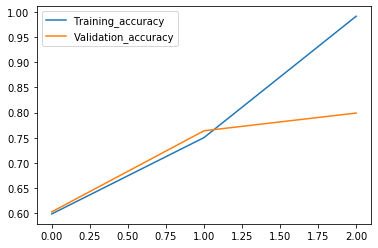

In [102]:
plt.plot(history.history['accuracy'], label= 'Training_accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation_accuracy')
plt.legend();

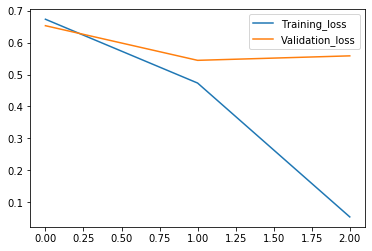

In [103]:
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.legend();

Using the history object, plot the model's accuracy (for both train and test).

# LSTM and Convolutional Neural Network For Sequence Classification

Convolutional neural networks excel at learning the spatial structure in input data. Our dataset does have a one-dimensional spatial structure in the sequence of words in reviews and the CNN may be able to pick out invariant features for good and bad sentiment. This learned spatial features may then be learned as sequences by an LSTM layer.

In [104]:
#num_words - This will be the maximum number of words 
#from our resulting tokenized data vocabulary which are to be used, 
#truncated after the 10000 most common words in our case.
tokenizer = Tokenizer(num_words=10000)
# Tokenize our training data'trainheadlines'
tokenizer.fit_on_texts(trainheadlines)

sequences_train = tokenizer.texts_to_sequences(trainheadlines)
sequences_test = tokenizer.texts_to_sequences(testheadlines)

In [105]:
# maxlen is feature of maximum sequence length for padding our encoded sentences

maxlen = 200

# truncate and pad input sequences, redefine X_train and X_val 
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_val = sequence.pad_sequences(sequences_test, maxlen=maxlen)

# convert y_train and y_val into array
y_train = np.array(y_train)
y_val = np.array(y_val)

# np_utils.to_categorical to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, 2)
Y_val = np_utils.to_categorical(y_val, 2)

We can now define our convolutional neural network model. This time, after the Embedding input layer, we insert a Conv1D layer. This convolutional layer has 32 feature maps and reads embedded word representations 3 vector elements of the word embedding at a time.

The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer.

In [106]:
# create the model
model = Sequential()
#Embedding
model.add(Embedding(max_features, 128))
#Convolutional 1D layer 
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#Maxpool 
model.add(MaxPooling1D(pool_size=2))
#LSTM
model.add(LSTM(100))
#Dense
model.add(Dense(2, activation='sigmoid'))
#Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          12320     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 1,345,722
Trainable params: 1,345,722
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
# Final evaluation of the model
history = model.fit(X_train, Y_train,
                    batch_size=64, 
                    epochs=5,
                    validation_data=(X_val, Y_val))

Train on 1790 samples, validate on 199 samples
Epoch 1/5
1790/1790 [==============================] - 8s 4ms/step - loss: 0.6333 - accuracy: 0.6047 - val_loss: 0.5087 - val_accuracy: 0.6030
Epoch 2/5
1790/1790 [==============================] - 7s 4ms/step - loss: 0.2180 - accuracy: 0.8997 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 3/5
1790/1790 [==============================] - 7s 4ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/5
1790/1790 [==============================] - 7s 4ms/step - loss: 3.5936e-04 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9925
Epoch 5/5
1790/1790 [==============================] - 7s 4ms/step - loss: 2.2699e-04 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9950


In [108]:
#Training Accuracy Score on training dataset
print("Generating training accuracy...")
#We take an average of the training accuracy score
trainingacc6 = np.mean(history.history['accuracy'])
print('Training Accuracy Score: ',trainingacc6)

Generating training accuracy...
Training Accuracy Score:  0.90089387


In [109]:
print("Generating test predictions...")
score, acc = model.evaluate(X_val, Y_val,batch_size=64)
preds6 = model.predict_classes(X_val, verbose=0)
acc6 = accuracy_score(y_val, preds6)
print('Prediction accuracy: ', acc6)

Generating test predictions...
199/199 [==============================] - 0s 1ms/step
Prediction accuracy:  0.9949748743718593


In [110]:
# predict ROC-AUC score 
predictions = model.predict_proba(X_val)
rocauc6 = str(roc_auc_score(Y_val, predictions))
print("ROC-AUC-score5 :", rocauc6)

ROC-AUC-score5 : 1.0


#### Visualizing model training

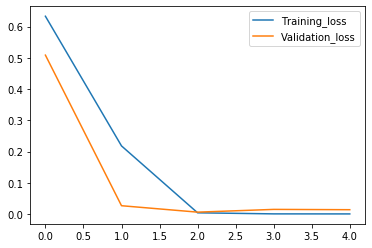

In [111]:
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.legend();

### Using the history object, plot the model's accuracy (for both train and test).

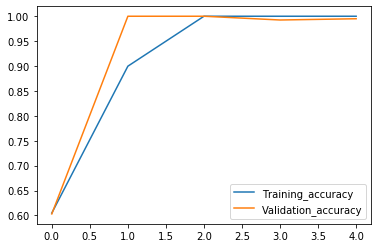

In [112]:
plt.plot(history.history['accuracy'], label= 'Training_accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation_accuracy')
plt.legend();

A combination of LSTM and Convolutional Neural Network seem to produce the best results.

# LETS COMPARE THE SCORE OF THE MODELS

In [113]:
#settings the parameters of the dataframe

#Model type
Model               = ['Countvectandlogreg',
                       'TDIFandlogreg',
                       'NaivesbayesandTDIF',
                       'randomforestandTDIF',
                       'LSTM3layers',
                       'LSTMandCNN']
#Training Dataset Accuracy Scores
Training_Accuracy   = [trainingacc1,
                       trainingacc2,
                       trainingacc3,
                       trainingacc4,
                       trainingacc5,
                       trainingacc6]

#Prediction Dataset Accuracy Scores
Prediction_Accuracy = [acc1,
                       acc2,
                       acc3,
                       acc4,
                       acc5,
                       acc6]

#ROC_AUC_scores
Roc_Auc_score       = [rocauc1,
                       rocauc2,
                       rocauc3,
                       rocauc4,
                       rocauc5,
                       rocauc6]

In [114]:
# Produce a summary table of the tuned classifiers
summary = pd.DataFrame(
    {'Model':Model,
     'Training dataset accuracy'   :Training_Accuracy,
     'Validation dataset accuracy' :Prediction_Accuracy,
     'Validation dataset AUC score':Roc_Auc_score})
  
pd.set_option('display.max_colwidth', -1)
summary.sort_values('Validation dataset accuracy', ascending=False).reset_index(drop=True)
summary

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Model,Training dataset accuracy,Validation dataset accuracy,Validation dataset AUC score
0,Countvectandlogreg,0.622372,0.563166,0.497186
1,TDIFandlogreg,0.754505,0.604262,0.517918
2,NaivesbayesandTDIF,0.617868,0.605784,0.509223
3,randomforestandTDIF,0.994745,0.535769,0.994672
4,LSTM3layers,0.780074,0.798995,0.9154008438818565
5,LSTMandCNN,0.900894,0.994975,1.0


### Conclusion

The table above shows the performance of the various models and the different metrics used to evaluate the models, namely Accuracy, AUC scores and sensitivity. The classifiers are sorted based on descending order of the sensitivity score on the validation dataset.

We choose the LSTM3layers as our best classifier, given that it has the highest AUC score on the validation dataset (0.66) and an accuracy of 63% (slightly beter than the baseline accuracy at 60%).

## ROC_AUC for the final model chosen

In [115]:
# Create a dataframe called pred_df that contains:
# 1. The list of true values of our validation set.
# 2. The list of predicted probabilities based on our model.

true_y = [i[1] for i in Y_val]

pred_proba = [i[1] for i in model.predict_proba(X_val)]

pred_df = pd.DataFrame({'true_values': true_y,'pred_probs':pred_proba})

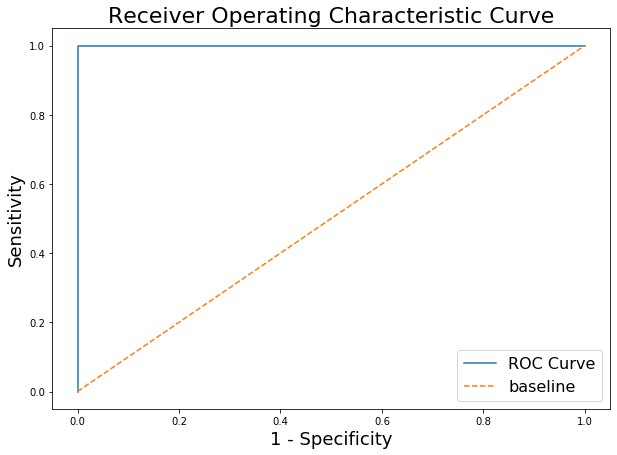

In [116]:
# Plot ROC_AUC Curve

#Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);